So far, we've looked at regression and classification. These are both types of supervised machine learning. In supervised learning, you train an algorithm to predict an unknown variable from known variables.

Another major type of machine learning is called unsupervised learning. In unsupervised learning, we aren't trying to predict anything. Instead, we're finding patterns in data.

One of the main unsupervised learning techniques is called clustering. We use clustering when we're trying to explore a dataset, and understand the connections between the various rows and columns. For example, we can cluster NBA players based on their statistics. Here's how such a clustering might look:

NBA clusters

The clusters made it possible to discover player roles that might not have been noticed otherwise. Here's an article that describes how the clusters were created.

Clustering algorithms group similar rows together. There can be one or more groups in the data, and these groups form the clusters. As we look at the clusters, we can start to better understand the structure of the data.

Clustering is a key way to explore unknown data, and it's a very commonly used machine learning technique. In this mission, we'll work on clustering US Senators based on how they voted.



In [1]:
import pandas as pd
votes =pd.read_csv('/home/kamlesh/AnacondaProjects/Dataquest/Data/114_congress.csv')

In [2]:
votes.head()

,name,party,state,00001,00004,00005,00006,00007,00008,00009,00010,00020,00026,00032,00038,00039,00044,00047
0,Alexander,R,TN,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Ayotte,R,NH,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,Baldwin,D,WI,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
3,Barrasso,R,WY,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,Bennet,D,CO,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [3]:
votes.describe()

,00001,00004,00005,00006,00007,00008,00009,00010,00020,00026,00032,00038,00039,00044,00047
count,100.000000,100.000000,100.000000,100.00000,100.00000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.325000,0.575000,0.535000,0.94500,0.54500,0.415000,0.54500,0.985000,0.525000,0.545000,0.410000,0.480000,0.510000,0.460000,0.370000
std,0.462618,0.494286,0.498761,0.22355,0.49795,0.492648,0.49795,0.111351,0.494286,0.487702,0.489176,0.497062,0.497367,0.495841,0.480004
min,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.00000,0.00000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,1.000000,1.00000,1.00000,0.000000,1.00000,1.000000,1.000000,1.000000,0.000000,0.000000,0.750000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


instructions

    Find how many Senators are in each party.
        Use the value_counts() method on the party column of votes. Print the results.
    Find what the "average" vote for each bill was.
        Use the mean() method on the votes Dataframe. If the mean for a column is less than .5, more Senators voted against the bill, and vice versa if it's over .5. Print the results.


In [4]:
print( votes['party'].value_counts() )

R    54
D    44
I     2
Name: party, dtype: int64

In [4]:
from sklearn.metrics.pairwise import euclidean_distances
distance= euclidean_distances(votes.iloc[0,3:].values.reshape(1, -1), votes.iloc[1,3:].values.reshape(1, -1))
#distance = euclidean_distances( votes.iloc[0,3:], votes.iloc[2,3:] )

In [6]:
votes.iloc[0,3:].values.reshape(1, -1)

array([[0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0,
        0.0, 0.0]], dtype=object)

### Fitting the model

In [12]:
import pandas as pd
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters=2, random_state=1)
senator_distances = kmeans_model.fit_transform( votes.iloc[:,3:] )
print(senator_distances)

[[ 3.12141628  1.3134775 ]
 [ 2.6146248   2.05339992]
 [ 0.33960656  3.41651746]
 [ 3.42004795  0.24198446]
 [ 1.43833966  2.96866004]
 [ 0.33960656  3.41651746]
 [ 3.42004795  0.24198446]
 [ 0.33960656  3.41651746]
 [ 3.42004795  0.24198446]
 [ 0.31287498  3.30758755]
 [ 0.33960656  3.41651746]
 [ 3.27058526  0.96734144]
 [ 0.33960656  3.41651746]
 [ 3.34875646  0.53945585]
 [ 0.33960656  3.41651746]
 [ 1.18084816  3.12695614]
 [ 1.23852221  3.13536063]
 [ 3.42004795  0.24198446]
 [ 3.42004795  0.24198446]
 [ 3.42004795  0.24198446]
 [ 2.6146248   2.05339992]
 [ 0.58487332  3.31421108]
 [ 3.42004795  0.24198446]
 [ 3.42004795  0.24198446]
 [ 3.42004795  0.24198446]
 [ 3.42004795  0.24198446]
 [ 3.56324683  0.93036231]
 [ 3.42004795  0.24198446]
 [ 1.73847904  2.82326711]
 [ 0.33960656  3.41651746]
 [ 3.42004795  0.24198446]
 [ 3.42004795  0.24198446]
 [ 0.33960656  3.41651746]
 [ 3.42004795  0.24198446]
 [ 3.42004795  0.24198446]
 [ 0.58487332  3.31421108]
 [ 3.27058526  0.92088553]
 

In [10]:
labels = kmeans_model.labels_
#print( labels)
print( pd.crosstab( labels,votes['party'] ) )

party   D  I   R
row_0           
0      41  2   0
1       3  0  54


In [22]:
import numpy as np
a = np.array(["foo", "foo", "foo", "foo", "bar", "bar",
               "bar", "bar", "foo", "foo", "foo"], dtype=object)
b = np.array(["one", "one", "one", "two", "one", "one",
               "one", "two", "two", "two", "one"], dtype=object)
c = np.array(["dull", "dull", "shiny", "dull", "dull", "shiny",
               "shiny", "dull", "shiny", "shiny", "shiny"],
               dtype=object)

In [23]:
pd.crosstab(a, [b, c], rownames=['a'], colnames=['b', 'c'])

b    one        two      
c   dull shiny dull shiny
a                        
bar    1     2    1     0
foo    2     2    1     2

In [26]:
pd.crosstab(a,b)

col_0,one,two
row_0,,
bar,3,1
foo,4,3


In [27]:
pd.crosstab(a,[b,c])

col_0  one        two      
col_1 dull shiny dull shiny
row_0                      
bar      1     2    1     0
foo      2     2    1     2

In [11]:
democratic_outliers = votes[(labels == 1) & ( votes['party'] == "D")] 
print(democratic_outliers)

        name party state  00001  00004  00005  00006  00007  00008  00009  \
42  Heitkamp     D    ND    0.0    1.0    0.0    1.0    0.0    0.0    1.0   
56   Manchin     D    WV    0.0    1.0    0.0    1.0    0.0    0.0    1.0   
74      Reid     D    NV    0.5    0.5    0.5    0.5    0.5    0.5    0.5   

    00010  00020  00026  00032  00038  00039  00044  00047  
42    1.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0  
56    1.0    1.0    0.0    0.0    1.0    1.0    0.0    0.0  
74    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5  


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

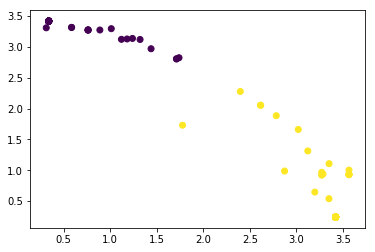

In [15]:
plt.scatter(x = senator_distances[:,0],y = senator_distances[:,1],c = labels)
plt.show()

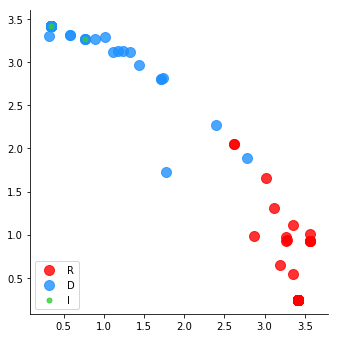

In [19]:
df = pd.DataFrame(data=senator_distances,
                  columns=['x','y'],
                  index=votes.index)
df['party'] = votes['party']

sns.lmplot(x='x', y='y', data=df, fit_reg=False,
           hue='party', legend=False,
           markers=['o','o','.'], scatter_kws={'s':100},
           palette=['red','dodgerblue','limegreen'])
plt.legend(loc='lower left')
plt.xlabel('')
plt.ylabel('')
plt.show()

No handles with labels found to put in legend.


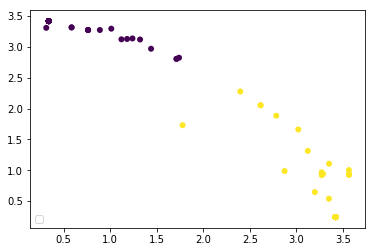

In [21]:
plt.scatter(x=senator_distances[:,0], y=senator_distances[:,1], c=labels, linewidths=0)
plt.legend(loc='lower left')
plt.show()

In [58]:
extremism = (senator_distances ** 3).sum(axis=1)
votes["extremism"] = extremism
votes.sort_values("extremism", inplace=True, ascending=False)
votes.head(10)

,name,party,state,00001,00004,00005,00006,00007,00008,00009,00010,00020,00026,00032,00038,00039,00044,00047,extremism
78,Rubio,R,FL,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.5,0.5,0.5,0.5,0.5,46.250476
63,Mikulski,D,MD,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,46.046873
55,Lee,R,UT,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.5,0.5,0.0,0.0,1.0,0.0,0.0,46.046873
50,King,I,ME,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,46.046873
24,Cotton,R,AR,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,46.046873
67,Murray,D,WA,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,40.017540
61,Menendez,D,NJ,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,40.017540
29,Durbin,D,IL,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,40.017540
79,Sanders,I,VT,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,40.017540
6,Blunt,R,MO,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,40.017540


http://www.databasebasketball.com/about/aboutstats.htm

In [68]:
import pandas as pd
import numpy as np

nba = pd.read_csv("/home/kamlesh/AnacondaProjects/Dataquest/Data/nba_2013.csv")
nba.head(3)

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013


Point guards play one of the most crucial roles on a team because their primary responsibility is to create scoring opportunities for the team. We are going to focus our lesson on a machine learning technique called clustering, which allows us to visualize the types of point guards as well as group similar point guards together. Using 2 features allows us to easily visualize the players and will also make it easier to grasp how clustering works. For point guards, it's widely accepted that the Assist to Turnover Ratio is a good indicator for performance in games as it quantifies the number of scoring opportunities that player created. Let's also use Points Per Game, since effective Point Guards not only set up scoring opportunities but also take a lot of the shots themselves.

In [69]:
point_guards = nba[nba['pos']=='PG']
point_guards.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
24,D.J. Augustin,PG,26,TOT,71,9,1939,298,718,0.415,...,115,130,313,53,3,125,147,930,2013-2014,2013
29,Leandro Barbosa,PG,31,PHO,20,0,368,56,131,0.427,...,32,37,32,7,4,19,30,150,2013-2014,2013
30,Jose Barea,PG,29,MIN,79,1,1471,254,656,0.387,...,138,154,303,26,0,125,129,660,2013-2014,2013
38,Jerryd Bayless,PG,25,TOT,72,19,1686,248,617,0.402,...,123,145,194,60,9,82,161,666,2013-2014,2013
50,Steve Blake,PG,33,TOT,55,28,1498,133,353,0.377,...,146,159,307,54,8,102,85,378,2013-2014,2013


In [70]:
point_guards['ppg'] = point_guards['pts'] / point_guards['g']

# Sanity check, make sure ppg = pts/g
point_guards[['pts', 'g', 'ppg']].head(5)

/home/kamlesh/anaconda3/envs/Py35/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,pts,g,ppg
24,930,71,13.098592
29,150,20,7.500000
30,660,79,8.354430
38,666,72,9.250000
50,378,55,6.872727



    Drop the players who have 0 turnovers.
        Not only did these players only play a few games, making it hard to understand their true abilities, but we also cannot divide by 0 when we calculate atr.
    Utilize the same division technique we used with Points Per Game to create the Assist Turnover Ratio (atr) column for point_guards.


In [71]:

point_guards = point_guards[point_guards['tov'] != 0]

point_guards['atr'] = point_guards['ast'] / point_guards['tov']



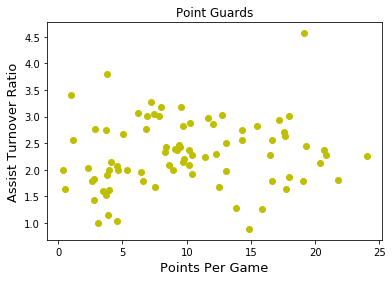

In [72]:
# plot is not correctly showing the red oint
plt.scatter(point_guards['ppg'], point_guards['atr'], c='y')
plt.title("Point Guards")
plt.xlabel('Points Per Game', fontsize=13)
plt.ylabel('Assist Turnover Ratio', fontsize=13)
plt.show()

In [73]:
num_clusters = 5
# Use numpy's random function to generate a list, length: num_clusters, of indices
random_initial_points = np.random.choice(point_guards.index, size=num_clusters)
# Use the random indices to create the centroids
centroids = point_guards.loc[random_initial_points]

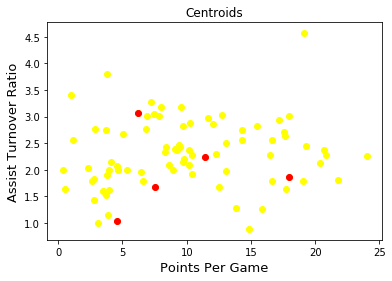

In [74]:
plt.scatter(point_guards['ppg'], point_guards['atr'], c='yellow')
plt.scatter(centroids['ppg'], centroids['atr'], c='red')
plt.title("Centroids")
plt.xlabel('Points Per Game', fontsize=13)
plt.ylabel('Assist Turnover Ratio', fontsize=13)
plt.show()

In [75]:
def centroids_to_dict(centroids):
    dictionary = dict()
    # iterating counter we use to generate a cluster_id
    counter = 0

    # iterate a pandas data frame row-wise using .iterrows()
    for index, row in centroids.iterrows():
        coordinates = [row['ppg'], row['atr']]
        dictionary[counter] = coordinates
        counter += 1

    return dictionary

centroids_dict = centroids_to_dict(centroids)

In [76]:
#helper function
import math

def calculate_distance(centroid, player_values):
    root_distance = 0
    
    for x in range(0, len(centroid)):
        difference = centroid[x] - player_values[x]
        squared_difference = difference**2
        root_distance += squared_difference

    euclid_distance = math.sqrt(root_distance)
    return euclid_distance

q = [5, 2]
p = [3,1]

# Sqrt(5) = ~2.24
print(calculate_distance(q, p))

2.23606797749979


In [77]:
# Add the function, `assign_to_cluster`
# This creates the column, `cluster`, by applying assign_to_cluster row-by-row
# Uncomment when ready

def assign_to_cluster(row):
    lowest_distance = -1
    closest_cluster = -1
    
    for centroid, values in centroids_dict.items():
        df_row = [ row['ppg'],row['atr'] ]
        euclidean_distance = calculate_distance( df_row,values )
        
        if lowest_distance == -1:
            lowest_distance = euclidean_distance
            closest_cluster = centroid
        else:
            if euclidean_distance < lowest_distance: 
                lowest_distance = euclidean_distance
                closest_cluster = centroid
                
    return closest_cluster        
                
point_guards['cluster'] = point_guards.apply(lambda row: assign_to_cluster(row), axis=1)

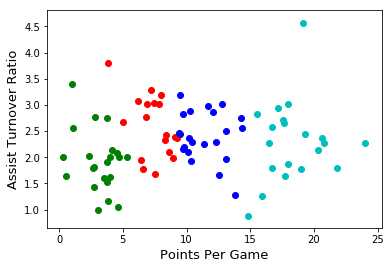

In [79]:
# Visualizing clusters
def visualize_clusters(df, num_clusters):
    colors = ['b', 'g', 'r', 'c', 'm','k','b','g','r']

    for n in range(num_clusters):
        clustered_df = df[df['cluster'] == n]
        plt.scatter(clustered_df['ppg'], clustered_df['atr'], c=colors[n-1])
        plt.xlabel('Points Per Game', fontsize=13)
        plt.ylabel('Assist Turnover Ratio', fontsize=13)    
    plt.show()

visualize_clusters(point_guards, 5)

In [80]:
def recalculate_centroids(df):
    new_centroids_dict = dict()
    # 0..1...2...3...4
    for cluster_id in range(0, num_clusters):
        # Finish the logic
        # for each cluster Calculate the new mean 
        #ba[nba['pos']=='PG']
        cluster_data = point_guards[point_guards['cluster'] == cluster_id]
        mean_ppg = np.mean(cluster_data['ppg'].values )
        mean_atr = np.mean( cluster_data['atr'].values )                                
        
        new_centroids_dict[cluster_id] = [mean_ppg,mean_atr ]
        return new_centroids_dict

centroids_dict = recalculate_centroids(point_guards)

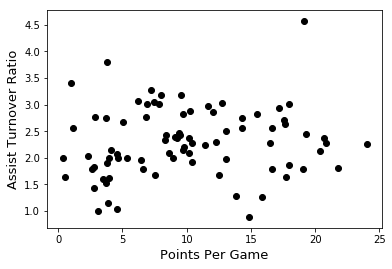

In [87]:

point_guards['cluster'] = point_guards.apply(lambda row: assign_to_cluster(row), axis=1)
#visualize_clusters(point_guards, 5) # function call not working
colors = ['b', 'g', 'r', 'c', 'm','k']
for n in range(5):
        clustered_df = point_guards[point_guards['cluster'] == n]
        plt.scatter(clustered_df['ppg'], clustered_df['atr'], c=colors[n-1])
        plt.xlabel('Points Per Game', fontsize=13)
        plt.ylabel('Assist Turnover Ratio', fontsize=13)    
plt.show()

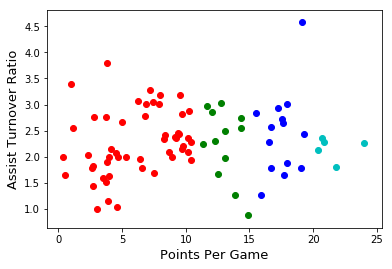

In [89]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(point_guards[['ppg', 'atr']])
point_guards['cluster'] = kmeans.labels_

visualize_clusters(point_guards, num_clusters)